In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")


In [2]:
df = pd.read_csv("data.csv")

# Convert date
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

# Date features
df["Day"] = df["Order_Date"].dt.day_name()
df["Day_Num"] = df["Order_Date"].dt.weekday

df.head()


,Order_ID,Order_Date,City,Delivery_Partner,Distance_km,Delivery_Time,Order_Value,Rating,Day,Day_Num
0,1,2024-01-05,Delhi,Zomato,5.2,30,450,4.5,Friday,4
1,2,2024-01-06,Delhi,Swiggy,8.5,45,700,3.8,Saturday,5
2,3,2024-01-07,Mumbai,Zomato,3.1,25,380,4.7,Sunday,6
3,4,2024-01-08,Pune,Swiggy,6.4,40,520,4.0,Monday,0
4,5,2024-01-09,Mumbai,Zomato,4.8,35,600,4.2,Tuesday,1


In [3]:
df.head()


,Order_ID,Order_Date,City,Delivery_Partner,Distance_km,Delivery_Time,Order_Value,Rating,Day,Day_Num
0,1,2024-01-05,Delhi,Zomato,5.2,30,450,4.5,Friday,4
1,2,2024-01-06,Delhi,Swiggy,8.5,45,700,3.8,Saturday,5
2,3,2024-01-07,Mumbai,Zomato,3.1,25,380,4.7,Sunday,6
3,4,2024-01-08,Pune,Swiggy,6.4,40,520,4.0,Monday,0
4,5,2024-01-09,Mumbai,Zomato,4.8,35,600,4.2,Tuesday,1


## which city has the fastest average delivery time ?


City
Pune      29.0
Mumbai    36.0
Delhi     38.0
Name: Delivery_Time, dtype: float64


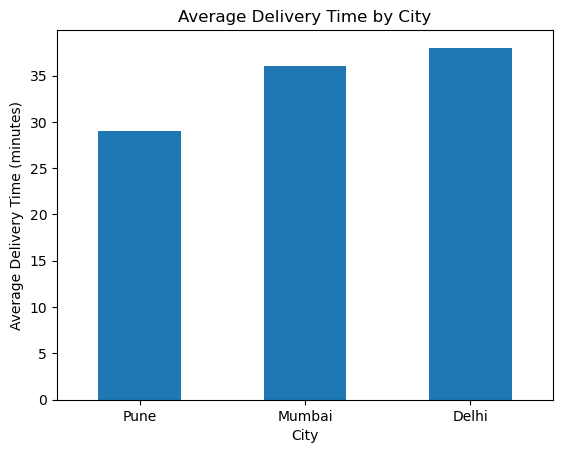

In [4]:
# which city has the fastest average delivery time ?

city_avg = df.groupby("City")["Delivery_Time"].mean().round().sort_values()
print(city_avg)
plt.figure()
city_avg.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Average Delivery Time (minutes)")
plt.title("Average Delivery Time by City")
plt.xticks(rotation=0)
plt.show()

## Does delivery distance impact delivery time?

               Distance_km  Delivery_Time
Distance_km       1.000000       0.969522
Delivery_Time     0.969522       1.000000


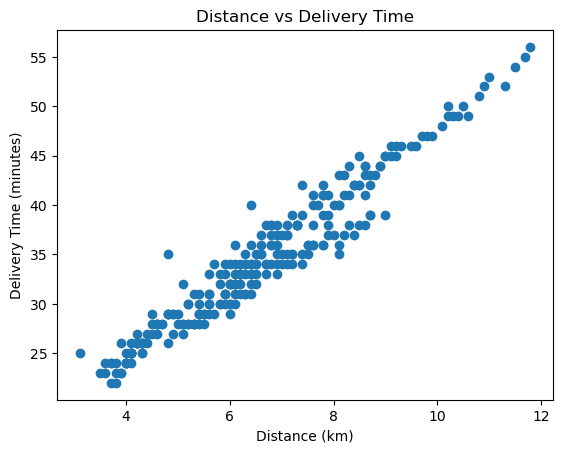

In [5]:
print(df[["Distance_km","Delivery_Time"]].corr())

plt.scatter(df["Distance_km"], df["Delivery_Time"])
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.title("Distance vs Delivery Time")
plt.show()


## Does fast delivery leads to better rating


               Delivery_Time    Rating
Delivery_Time       1.000000 -0.749319
Rating             -0.749319  1.000000


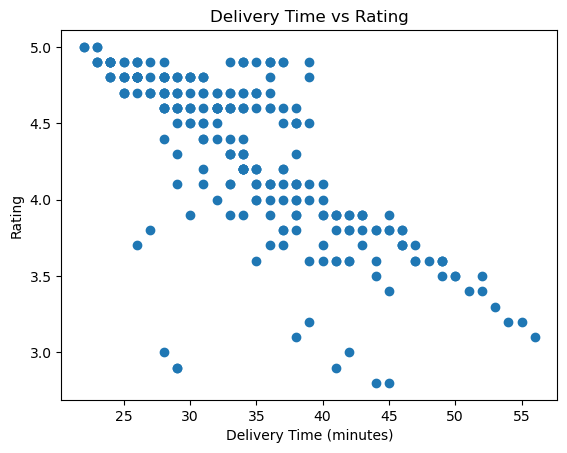

In [6]:
print(df[["Delivery_Time","Rating"]].corr())

plt.figure()
plt.scatter(df["Delivery_Time"], df["Rating"])
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Rating")
plt.title("Delivery Time vs Rating")
plt.show()

## Which delivery partner is faster 

  Delivery_Partner  Delivery_Time
0           Swiggy      37.944882
1           Zomato      31.000000


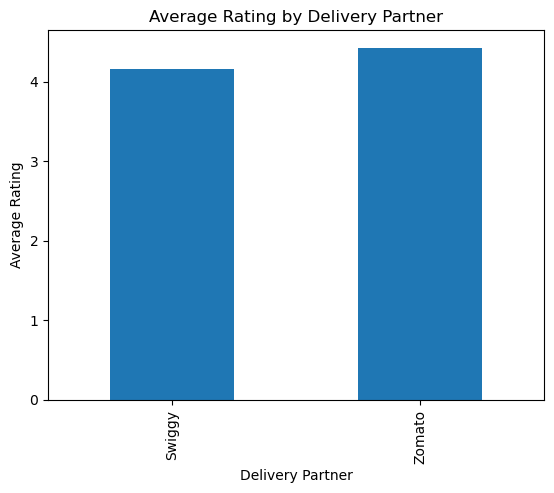

In [7]:
print(df.groupby("Delivery_Partner")["Delivery_Time"].mean().reset_index())

df.groupby("Delivery_Partner")["Rating"].mean().plot(kind="bar")
plt.xlabel("Delivery Partner")
plt.ylabel("Average Rating")
plt.title("Average Rating by Delivery Partner")
plt.show()


## Which city gets the best customer experience

City
Pune      4.50
Mumbai    4.27
Delhi     4.14
Name: Rating, dtype: float64


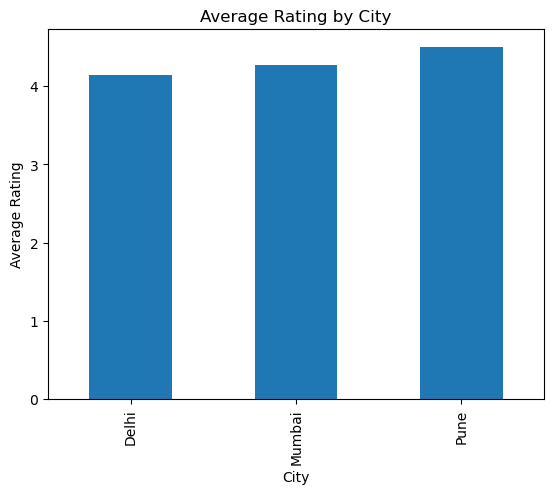

In [8]:
print(df.groupby("City")["Rating"].mean().round(2).sort_values(ascending=False))

df.groupby("City")["Rating"].mean().plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Average Rating by City")
plt.show()

## Are high value orders getting better rating

In [9]:
print(df[["Order_Value","Rating"]].sort_values(["Order_Value","Rating"],ascending=[False,False]))


    Order_Value  Rating
94          950     3.1
74          930     3.2
54          910     3.2
34          890     3.3
71          880     3.5
..          ...     ...
37          360     4.9
69          360     4.9
23          350     4.9
49          350     4.9
43          340     5.0

[257 rows x 2 columns]


             Order_Value    Rating
Order_Value     1.000000 -0.611752
Rating         -0.611752  1.000000


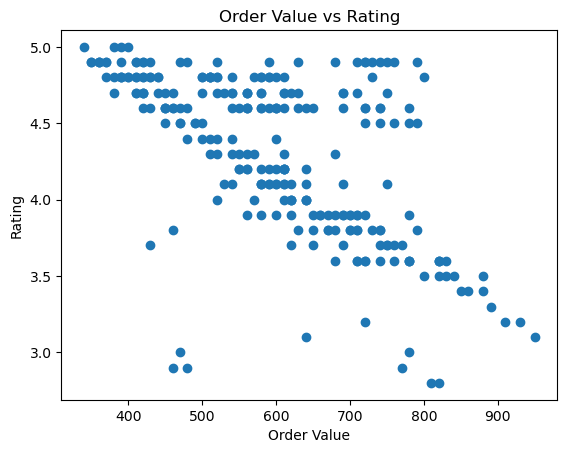

In [10]:
print(df[["Order_Value","Rating"]].corr())

plt.figure()
plt.scatter(df["Order_Value"], df["Rating"])
plt.xlabel("Order Value")
plt.ylabel("Rating")
plt.title("Order Value vs Rating")
plt.show()

## Which day of week has the worse performance

Day
Monday       4.067857
Tuesday      3.985185
Wednesday    3.962963
Thursday     3.796296
Friday       4.465909
Saturday     4.538636
Sunday       4.615000
Name: Rating, dtype: float64


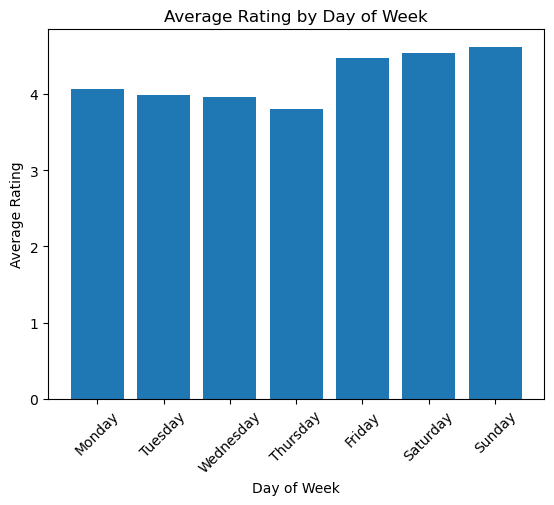

In [11]:

day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

avg_rating_day=df.groupby("Day")["Rating"] .mean().reindex(day_order)
print(avg_rating_day)

# Plot
plt.figure()
plt.bar(day_order, avg_rating_day.values)
plt.xlabel("Day of Week")
plt.ylabel("Average Rating")
plt.title("Average Rating by Day of Week")
plt.xticks(rotation=45)
plt.show()
